# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow

# Import API key
from api_keys import wapi_key

# Settings
settings = {"units":"imperial","appid":wapi_key}

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [15]:
cities_df = pd.DataFrame({'city':cities})
cities_df.head()

,city
0,puerto ayora
1,vostok
2,albany
3,saint-francois
4,baglan


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
weather_data = []

# API calls and store the response into a list
for index, row in cities_df.iterrows():
    # Try to grab weather information if they are available in OpenWeatherMap
    try:
        weather_data.append(ow.get_current(row[0],**settings))
        print(f'Processing Record {index} city: {row[0]} ! Appending weather')
        
    # Handle exceptions for not available cities
    except:
        print(f'city {row[0]} not found. Skipping...')
print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")

Processing Record 0 city: puerto ayora ! Appending weather
Processing Record 1 city: vostok ! Appending weather
Processing Record 2 city: albany ! Appending weather
Processing Record 3 city: saint-francois ! Appending weather
Processing Record 4 city: baglan ! Appending weather
city taolanaro not found. Skipping...
Processing Record 6 city: oistins ! Appending weather
Processing Record 7 city: victoria ! Appending weather
Processing Record 8 city: samarai ! Appending weather
Processing Record 9 city: geraldton ! Appending weather
Processing Record 10 city: ushuaia ! Appending weather
Processing Record 11 city: jamestown ! Appending weather
Processing Record 12 city: busselton ! Appending weather
Processing Record 13 city: cherskiy ! Appending weather
city louisbourg not found. Skipping...
Processing Record 15 city: palmer ! Appending weather
city sentyabrskiy not found. Skipping...
Processing Record 17 city: thompson ! Appending weather
Processing Record 18 city: punta arenas ! Appendi

Processing Record 150 city: port elizabeth ! Appending weather
Processing Record 151 city: namatanai ! Appending weather
Processing Record 152 city: isabela ! Appending weather
Processing Record 153 city: beroroha ! Appending weather
Processing Record 154 city: ambunti ! Appending weather
Processing Record 155 city: carnarvon ! Appending weather
Processing Record 156 city: alta floresta ! Appending weather
Processing Record 157 city: vila franca do campo ! Appending weather
Processing Record 158 city: idlib ! Appending weather
Processing Record 159 city: san quintin ! Appending weather
Processing Record 160 city: shubarkuduk ! Appending weather
Processing Record 161 city: pevek ! Appending weather
Processing Record 162 city: segovia ! Appending weather
Processing Record 163 city: chuy ! Appending weather
Processing Record 164 city: juybar ! Appending weather
Processing Record 165 city: nikolskoye ! Appending weather
Processing Record 166 city: acapulco ! Appending weather
city barentsb

Processing Record 297 city: boden ! Appending weather
city kytlym not found. Skipping...
Processing Record 299 city: dubrovnik ! Appending weather
city phan rang not found. Skipping...
Processing Record 301 city: mananara ! Appending weather
city amderma not found. Skipping...
Processing Record 303 city: ust-tsilma ! Appending weather
Processing Record 304 city: asau ! Appending weather
Processing Record 305 city: itoman ! Appending weather
Processing Record 306 city: hastings ! Appending weather
Processing Record 307 city: mareeba ! Appending weather
Processing Record 308 city: turukhansk ! Appending weather
Processing Record 309 city: port keats ! Appending weather
Processing Record 310 city: kruisfontein ! Appending weather
Processing Record 311 city: weihe ! Appending weather
Processing Record 312 city: slavyanka ! Appending weather
Processing Record 313 city: marsa matruh ! Appending weather
Processing Record 314 city: ilulissat ! Appending weather
Processing Record 315 city: saur

Processing Record 448 city: porgera ! Appending weather
Processing Record 449 city: henties bay ! Appending weather
city macaboboni not found. Skipping...
Processing Record 451 city: coquimbo ! Appending weather
Processing Record 452 city: jacareacanga ! Appending weather
Processing Record 453 city: adrar ! Appending weather
Processing Record 454 city: tautira ! Appending weather
Processing Record 455 city: chimbote ! Appending weather
Processing Record 456 city: atasu ! Appending weather
Processing Record 457 city: mendi ! Appending weather
Processing Record 458 city: doha ! Appending weather
Processing Record 459 city: parbatipur ! Appending weather
Processing Record 460 city: haverfordwest ! Appending weather
Processing Record 461 city: gloversville ! Appending weather
Processing Record 462 city: coihaique ! Appending weather
Processing Record 463 city: lwowek slaski ! Appending weather
Processing Record 464 city: opuwo ! Appending weather
Processing Record 465 city: korla ! Appendi

city makung not found. Skipping...
Processing Record 599 city: nizhneudinsk ! Appending weather
Processing Record 600 city: gagra ! Appending weather
Processing Record 601 city: kimparana ! Appending weather
Processing Record 602 city: chandil ! Appending weather
Processing Record 603 city: batemans bay ! Appending weather
Processing Record 604 city: mattru ! Appending weather
Processing Record 605 city: mountain home ! Appending weather
Processing Record 606 city: changji ! Appending weather
Processing Record 607 city: ongandjera ! Appending weather
Processing Record 608 city: charters towers ! Appending weather
Processing Record 609 city: raudeberg ! Appending weather
Processing Record 610 city: tirau ! Appending weather
Processing Record 611 city: povenets ! Appending weather
Processing Record 612 city: shalakusha ! Appending weather
Processing Record 613 city: sabang ! Appending weather
Processing Record 614 city: nicoya ! Appending weather
Processing Record 615 city: grindavik ! A

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
# Create lists to store relevant data
city = []
country = []
date = []
lat = []
lon = []
temp_max = []
humidity = []
cloudiness = []
wind_speed = []

# Loop thru the response list
for i in range(len(weather_data)):
    city.append(weather_data[i]['name'])
    date.append(weather_data[i]['dt'])
    country.append(weather_data[i]['sys']['country'])
    lat.append(weather_data[i]['coord']['lat'])
    lon.append(weather_data[i]['coord']['lon'])
    temp_max.append(weather_data[i]['main']['temp_max'])
    humidity.append(weather_data[i]['main']['humidity'])
    cloudiness.append(weather_data[i]['clouds']['all'])
    wind_speed.append(weather_data[i]['wind']['speed'])

# Convert raw data to DataFrame
weather_df = pd.DataFrame({"City" : city,
                           "Cloudiness": cloudiness,
                           "Country":country,
                           "Date": date,
                           "Humidity" : humidity,
                           "Lat": lat,
                           "Lng": lon,
                           "Max Temp": temp_max,
                           "Wind Speed": wind_speed})
weather_df.head()

# Export the data into csv
weather_df.to_csv('weather_data.csv',index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

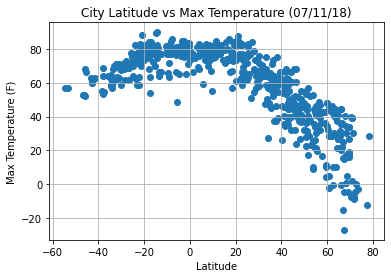

In [20]:
# Build a scatter plot for each data type
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs Max Temperature (07/11/18)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid('True')

# Save the figure
plt.savefig('figures/LatvsTemperature.png')

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

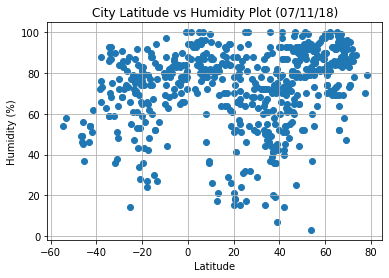

In [21]:
# Build a scatter plot for each data type
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity Plot (07/11/18)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid('True')

# Save the figure
plt.savefig('figures/LatvsHumidity.png')

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

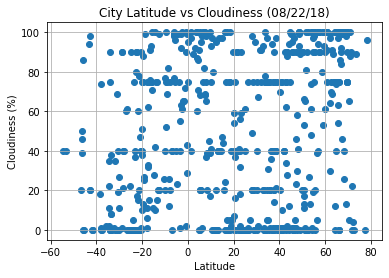

In [22]:
# Build a scatter plot for each data type
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness (08/22/18)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid('True')

# Save the figure
plt.savefig('figures/LatvsCloudiness.png')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

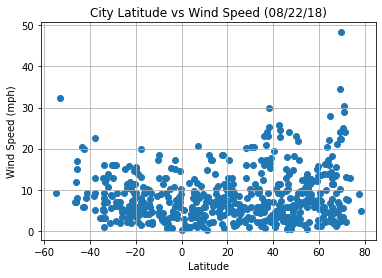

In [23]:
# Build a scatter plot for each data type
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed (08/22/18)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid('True')

# Save the figure
plt.savefig('figures/LatvsWindSpeed.png')

# Show plot
plt.show()